In [0]:
! pip install pytube3
# misc
from pytube import YouTube

import os
import shutil
import math
import datetime

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# image operation
import cv2

import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.0.0


In [0]:
# first video
video = YouTube('https://www.youtube.com/watch?v=Tu3TiESKJGk')

In [0]:
video.streams.all()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  """Entry point for launching an IPython kernel.


[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">,
 <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="399" mime_type="video/mp4" res="None" fps="30fps" vcodec="av01.0.08M.08" progressive="False" type="video">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">,
 <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="398" mime_type="video/mp4" res="None" fps="30fps" vcodec="av01.0.05M.08" progressive="False" type="video">

In [0]:
# use mp4
video.streams.filter(file_extension = "mp4").all()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  """Entry point for launching an IPython kernel.


[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">,
 <Stream: itag="399" mime_type="video/mp4" res="None" fps="30fps" vcodec="av01.0.08M.08" progressive="False" type="video">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">,
 <Stream: itag="398" mime_type="video/mp4" res="None" fps="30fps" vcodec="av01.0.05M.08" progressive="False" type="video">,
 <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">,
 <Stream: itag="397" mime_type="video/mp4" res="None" fps="30fps" vcodec="av01.0.04M.08" progressive="False

In [0]:
video.streams.get_by_itag(18).download()

'/content/Family Guy Funny Moments 1.mp4'

In [0]:
# Frame Extractor Code (pulled from this github: https://github.com/erykml/medium_articles/blob/master/Misc/downloading_youtube_videos.ipynb)

class FrameExtractor():
    '''
    Class used for extracting frames from a video file.
    '''
    def __init__(self, video_path):
        self.video_path = video_path
        self.vid_cap = cv2.VideoCapture(video_path)
        self.n_frames = int(self.vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = int(self.vid_cap.get(cv2.CAP_PROP_FPS))
        
    def get_video_duration(self):
        duration = self.n_frames/self.fps
        print(f'Duration: {datetime.timedelta(seconds=duration)}')
        
    def get_n_images(self, every_x_frame):
        n_images = math.floor(self.n_frames / every_x_frame) + 1
        print(f'Extracting every {every_x_frame} (nd/rd/th) frame would result in {n_images} images.')
        
    def extract_frames(self, every_x_frame, img_name, dest_path=None, img_ext = '.jpg'):
        if not self.vid_cap.isOpened():
            self.vid_cap = cv2.VideoCapture(self.video_path)
        
        if dest_path is None:
            dest_path = os.getcwd()
        else:
            if not os.path.isdir(dest_path):
                os.mkdir(dest_path)
                print(f'Created the following directory: {dest_path}')
        
        frame_cnt = 0
        img_cnt = 0

        while self.vid_cap.isOpened():
            
            success,image = self.vid_cap.read() 
            
            if not success:
                break
            
            if frame_cnt % every_x_frame == 0:
                img_path = os.path.join(dest_path, ''.join([img_name, '_', str(img_cnt), img_ext]))
                cv2.imwrite(img_path, image)  
                img_cnt += 1
                
            frame_cnt += 1
        
        self.vid_cap.release()
        cv2.destroyAllWindows()


In [0]:
# instantiate class and pull frames

fe = FrameExtractor('/content/Family Guy Funny Moments 1.mp4')


In [0]:
# get video duration

fe.get_video_duration()

Duration: 0:08:26.100000


In [0]:
# calculate how many images

fe.get_n_images(every_x_frame=50)

Extracting every 50 (nd/rd/th) frame would result in 304 images.


In [0]:
# extract into colab directory

fe.extract_frames(every_x_frame=50, 
                  img_name='familyguytest', 
                  dest_path='familyguytest')


In [0]:
# look at images

! ls familyguytest

familyguytest_0.jpg    familyguytest_192.jpg  familyguytest_284.jpg
familyguytest_100.jpg  familyguytest_193.jpg  familyguytest_285.jpg
familyguytest_101.jpg  familyguytest_194.jpg  familyguytest_286.jpg
familyguytest_102.jpg  familyguytest_195.jpg  familyguytest_287.jpg
familyguytest_103.jpg  familyguytest_196.jpg  familyguytest_288.jpg
familyguytest_104.jpg  familyguytest_197.jpg  familyguytest_289.jpg
familyguytest_105.jpg  familyguytest_198.jpg  familyguytest_28.jpg
familyguytest_106.jpg  familyguytest_199.jpg  familyguytest_290.jpg
familyguytest_107.jpg  familyguytest_19.jpg   familyguytest_291.jpg
familyguytest_108.jpg  familyguytest_1.jpg    familyguytest_292.jpg
familyguytest_109.jpg  familyguytest_200.jpg  familyguytest_293.jpg
familyguytest_10.jpg   familyguytest_201.jpg  familyguytest_294.jpg
familyguytest_110.jpg  familyguytest_202.jpg  familyguytest_295.jpg
familyguytest_111.jpg  familyguytest_203.jpg  familyguytest_296.jpg
familyguytest_112.jpg  familyguytest_204.jpg  fam

In [0]:
# %rm -rf stan/

In [0]:
# gather up cartman images

In [0]:
# second video
video = YouTube('https://www.youtube.com/watch?v=cQi3oSeBVzA')

In [0]:
# video.streams.all()

In [0]:
# use mp4
# video.streams.filter(file_extension = "mp4").all()

In [0]:
video.streams.get_by_itag(18).download()

'/content/The best of Eric Cartman.mp4'

In [0]:
fe = FrameExtractor('/content/The best of Eric Cartman.mp4')

In [0]:
fe.get_video_duration()

Duration: 0:04:25.241379


In [0]:
fe.get_n_images(every_x_frame=25)

Extracting every 25 (nd/rd/th) frame would result in 308 images.


In [0]:
fe.extract_frames(every_x_frame=25, 
                  img_name='cartman', 
                  dest_path='cartman')

Created the following directory: cartman


In [0]:
! ls cartman

In [0]:
# %rm -rf southpark1_images/

In [0]:
# gather up images of Kenny

In [0]:
# third video
video = YouTube('https://www.youtube.com/watch?v=bkQmKXGd6eY')

In [0]:
video.streams.get_by_itag(18).download()

'/content/South Park - Kennys Woohoo moments.mp4'

In [0]:
fe = FrameExtractor('/content/kenny.mp4')

In [0]:
fe.get_video_duration()

Duration: 0:00:56.791667


In [0]:
fe.get_n_images(every_x_frame=15)

Extracting every 15 (nd/rd/th) frame would result in 91 images.


In [0]:
fe.extract_frames(every_x_frame=15, 
                  img_name='kenny', 
                  dest_path='kenny')

Created the following directory: kenny


In [0]:
! ls kenny

In [0]:
# gather up images of butters

In [0]:
# fourth video
video = YouTube('https://www.youtube.com/watch?v=5BblWqLNRO0')

In [0]:
video.streams.get_by_itag(18).download()

'/content/The Best of Butters.mp4'

In [0]:
fe = FrameExtractor('/content/The Best of Butters.mp4')

In [0]:
fe.get_video_duration()

Duration: 0:02:20


In [0]:
fe.get_n_images(every_x_frame=15)

Extracting every 15 (nd/rd/th) frame would result in 271 images.


In [0]:
fe.extract_frames(every_x_frame=15, 
                  img_name='butters', 
                  dest_path='butters')

Created the following directory: butters


In [0]:
! ls butters

butters_0.jpg	 butters_161.jpg  butters_222.jpg  butters_3.jpg
butters_100.jpg  butters_162.jpg  butters_223.jpg  butters_40.jpg
butters_101.jpg  butters_163.jpg  butters_224.jpg  butters_41.jpg
butters_102.jpg  butters_164.jpg  butters_225.jpg  butters_42.jpg
butters_103.jpg  butters_165.jpg  butters_226.jpg  butters_43.jpg
butters_104.jpg  butters_166.jpg  butters_227.jpg  butters_44.jpg
butters_105.jpg  butters_167.jpg  butters_228.jpg  butters_45.jpg
butters_106.jpg  butters_168.jpg  butters_229.jpg  butters_46.jpg
butters_107.jpg  butters_169.jpg  butters_22.jpg   butters_47.jpg
butters_108.jpg  butters_16.jpg   butters_230.jpg  butters_48.jpg
butters_109.jpg  butters_170.jpg  butters_231.jpg  butters_49.jpg
butters_10.jpg	 butters_171.jpg  butters_232.jpg  butters_4.jpg
butters_110.jpg  butters_172.jpg  butters_233.jpg  butters_50.jpg
butters_111.jpg  butters_173.jpg  butters_234.jpg  butters_51.jpg
butters_112.jpg  butters_174.jpg  butters_235.jpg  butters_52.jpg
butters_113.jpg

In [0]:
# grab images of stan

In [0]:
# fifth video
video = YouTube('https://www.youtube.com/watch?v=crJO8jgDEH0')

In [0]:
video.streams.get_by_itag(18).download()

'/content/2 Minutes of Stan Marsh.mp4'

In [0]:
fe = FrameExtractor('/content/2 Minutes of Stan Marsh.mp4')

In [0]:
fe.get_video_duration()

Duration: 0:02:21.260870


In [0]:
fe.get_n_images(every_x_frame=15)

Extracting every 15 (nd/rd/th) frame would result in 217 images.


In [0]:
fe.extract_frames(every_x_frame=15, 
                  img_name='stan', 
                  dest_path='stan')

Created the following directory: stan


In [0]:
! ls stan

stan_0.jpg    stan_13.jpg   stan_17.jpg   stan_23.jpg  stan_63.jpg
stan_100.jpg  stan_140.jpg  stan_180.jpg  stan_24.jpg  stan_64.jpg
stan_101.jpg  stan_141.jpg  stan_181.jpg  stan_25.jpg  stan_65.jpg
stan_102.jpg  stan_142.jpg  stan_182.jpg  stan_26.jpg  stan_66.jpg
stan_103.jpg  stan_143.jpg  stan_183.jpg  stan_27.jpg  stan_67.jpg
stan_104.jpg  stan_144.jpg  stan_184.jpg  stan_28.jpg  stan_68.jpg
stan_105.jpg  stan_145.jpg  stan_185.jpg  stan_29.jpg  stan_69.jpg
stan_106.jpg  stan_146.jpg  stan_186.jpg  stan_2.jpg   stan_6.jpg
stan_107.jpg  stan_147.jpg  stan_187.jpg  stan_30.jpg  stan_70.jpg
stan_108.jpg  stan_148.jpg  stan_188.jpg  stan_31.jpg  stan_71.jpg
stan_109.jpg  stan_149.jpg  stan_189.jpg  stan_32.jpg  stan_72.jpg
stan_10.jpg   stan_14.jpg   stan_18.jpg   stan_33.jpg  stan_73.jpg
stan_110.jpg  stan_150.jpg  stan_190.jpg  stan_34.jpg  stan_74.jpg
stan_111.jpg  stan_151.jpg  stan_191.jpg  stan_35.jpg  stan_75.jpg
stan_112.jpg  stan_152.jpg  stan_192.jpg  stan_36.jpg  stan_76.

In [0]:
# grab images of kyle 

In [0]:
# sixth video
video = YouTube('https://www.youtube.com/watch?v=Y2blKsRlFAk')

In [0]:
video.streams.get_by_itag(18).download()

'/content/Kyle Best Moments! South Park.mp4'

In [0]:
fe = FrameExtractor('/content/Kyle Best Moments! South Park.mp4')

In [0]:
fe.get_video_duration()

Duration: 0:02:35.241379


In [0]:
fe.get_n_images(every_x_frame=15)

Extracting every 15 (nd/rd/th) frame would result in 301 images.


In [0]:
fe.extract_frames(every_x_frame=15, 
                  img_name='kyle', 
                  dest_path='kyle')

Created the following directory: kyle


In [0]:
! ls kyle

kyle_0.jpg    kyle_155.jpg  kyle_20.jpg   kyle_265.jpg	kyle_49.jpg
kyle_100.jpg  kyle_156.jpg  kyle_210.jpg  kyle_266.jpg	kyle_4.jpg
kyle_101.jpg  kyle_157.jpg  kyle_211.jpg  kyle_267.jpg	kyle_50.jpg
kyle_102.jpg  kyle_158.jpg  kyle_212.jpg  kyle_268.jpg	kyle_51.jpg
kyle_103.jpg  kyle_159.jpg  kyle_213.jpg  kyle_269.jpg	kyle_52.jpg
kyle_104.jpg  kyle_15.jpg   kyle_214.jpg  kyle_26.jpg	kyle_53.jpg
kyle_105.jpg  kyle_160.jpg  kyle_215.jpg  kyle_270.jpg	kyle_54.jpg
kyle_106.jpg  kyle_161.jpg  kyle_216.jpg  kyle_271.jpg	kyle_55.jpg
kyle_107.jpg  kyle_162.jpg  kyle_217.jpg  kyle_272.jpg	kyle_56.jpg
kyle_108.jpg  kyle_163.jpg  kyle_218.jpg  kyle_273.jpg	kyle_57.jpg
kyle_109.jpg  kyle_164.jpg  kyle_219.jpg  kyle_274.jpg	kyle_58.jpg
kyle_10.jpg   kyle_165.jpg  kyle_21.jpg   kyle_275.jpg	kyle_59.jpg
kyle_110.jpg  kyle_166.jpg  kyle_220.jpg  kyle_276.jpg	kyle_5.jpg
kyle_111.jpg  kyle_167.jpg  kyle_221.jpg  kyle_277.jpg	kyle_60.jpg
kyle_112.jpg  kyle_168.jpg  kyle_222.jpg  kyle_278.jpg	kyle_61.jp

In [0]:
#########

In [0]:
# Let's look at the Data so 

In [0]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('/content/randy/randy_103.jpg')

In [0]:
# summarize some details about the image
print('randy')
print(image.format)
print(image.mode)
print(image.size)
print()
image = Image.open('/content/stan/stan_134.jpg')
print('stan')
print(image.format)
print(image.mode)
print(image.size)
print()
image = Image.open('/content/kyle/kyle_112.jpg')
print('kyle')
print(image.format)
print(image.mode)
print(image.size)
print()
image = Image.open('/content/kenny/kenny_83.jpg')
print('kenny')
print(image.format)
print(image.mode)
print(image.size)
print()
image = Image.open('/content/cartman/cartman_274.jpg')
print('cartman')
print(image.format)
print(image.mode)
print(image.size)
print()
image = Image.open('/content/butters/butters_122.jpg')
print('butters')
print(image.format)
print(image.mode)
print(image.size)
print()

randy
JPEG
RGB
(480, 360)

stan
JPEG
RGB
(640, 360)

kyle
JPEG
RGB
(640, 360)

kenny
JPEG
RGB
(640, 360)

cartman
JPEG
RGB
(640, 360)

butters
JPEG
RGB
(480, 360)



(360, 480, 3)


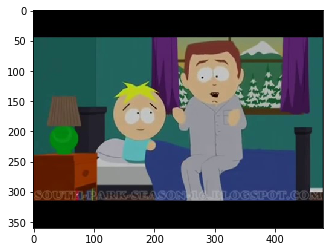

In [0]:
# Load one image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

print(np.asarray(image).shape)
imshow(np.asarray(image))

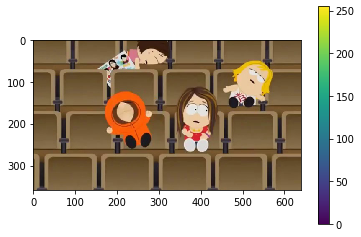

In [0]:
# Show color bar
import matplotlib.pyplot as plt
image = Image.open('/content/kenny/kenny_83.jpg')
plt.imshow(np.asarray(image))
plt.colorbar()

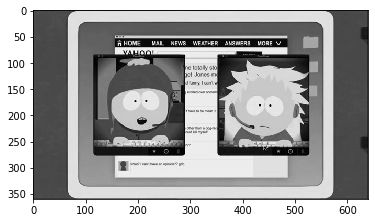

In [0]:
# Convert to grayscale
image = Image.open('/content/kyle/kyle_112.jpg')
gs_image = image.convert(mode='L')
imshow(np.asarray(gs_image), cmap='gray')

(100, 56)


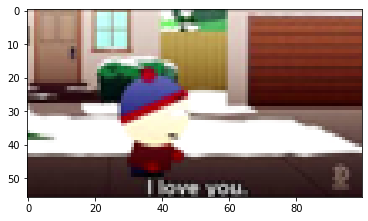

In [0]:
# Create a thumbnail and "preserve aspect ratio"
image = Image.open('/content/stan/stan_134.jpg')
image.thumbnail((100,100))
print(image.size)
imshow(np.asarray(image))

In [0]:
!pip install -U -q PyDrive

from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os
import sys

zipname = 'familyguytest'

def zipfolder(foldername, target_dir):            
    zipobj = zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) + 1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[rootlen:])

zipfolder(zipname, '/content/familyguytest')

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Create & upload a file text file.
file1 = drive.CreateFile()
file1.SetContentFile(zipname+".zip")
file1.Upload()